In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils import visualize_utils


In [2]:
log_root = r"C:\Users\jingyli\OwnDrive\IPA\attribution_Result\unet\attribution_pickle\resUnet"
figure_log_root = r"C:\Users\jingyli\OwnDrive\IPA\result\attribution_featureImportance"

region = ["urban","suburban"]
time = {
    84: "7AM-8AM",
    132: "11AM-12PM",
    204: "5PM-6PM",
    264: "10PM-11PM"
}

days = ["weekday","weekend"]
channels = ["volume","speed"]

file_format = "pdf"

In [3]:
def plot(agg_dynamic,dynamic_err,agg_static,static_err, figpath):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(18,9))

    BAR_WIDTH = 0.25
    x = np.arange(12)

    TITLENAME = ["volume", "speed"]
    for i in range(2):
        YLIM = round(np.maximum(np.max(agg_dynamic[i]+dynamic_err[i]), np.max(agg_static[i]+static_err[i]))+10)
        # Dynamic Features
        ax = axes[0,i]

        ax.bar(x-BAR_WIDTH, height=agg_dynamic[i][:,0], yerr=dynamic_err[i][:,0], label="Volume", width=BAR_WIDTH)
        ax.bar(x, height=agg_dynamic[i][:,1], label="Speed", yerr=dynamic_err[i][:,1], width=BAR_WIDTH)
        ax.bar(x+BAR_WIDTH, height=agg_dynamic[i][:,2], yerr=dynamic_err[i][:,2], label="Incident Level", width=BAR_WIDTH)

        ax.set_ylabel("Gradient value" , fontsize=16)
        ax.set_xlabel("Timestamp", fontsize=16)
        ax.set_xticks(x)
        ax.set_ylim(0,YLIM)
        ax.set_title("Attributions to predict "+TITLENAME[i], fontsize=16)
        ax.legend()

        # Static Features
        ax = axes[1,i]
        ax.bar(x=[
        'JunctionCount-False',
         'JunctionCount-True',
         'Casual',
         'Hospital',
         'Parking',
         'Shops',
         'Public Transport'], height=agg_static[i], yerr=static_err[i])
        ax.set_ylabel("Gradient value", fontsize=16)
        ax.set_xlabel("Static features", fontsize=16)
        ax.tick_params("x",rotation=90)
        ax.set_ylim(0,YLIM)
    plt.savefig(figpath, bbox_inches="tight")

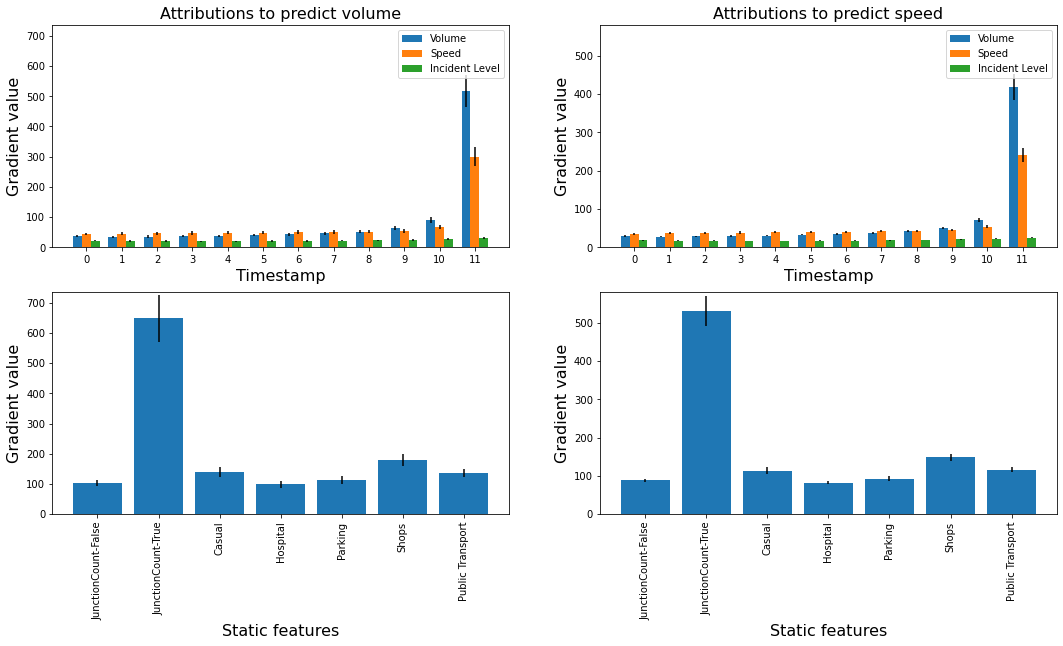

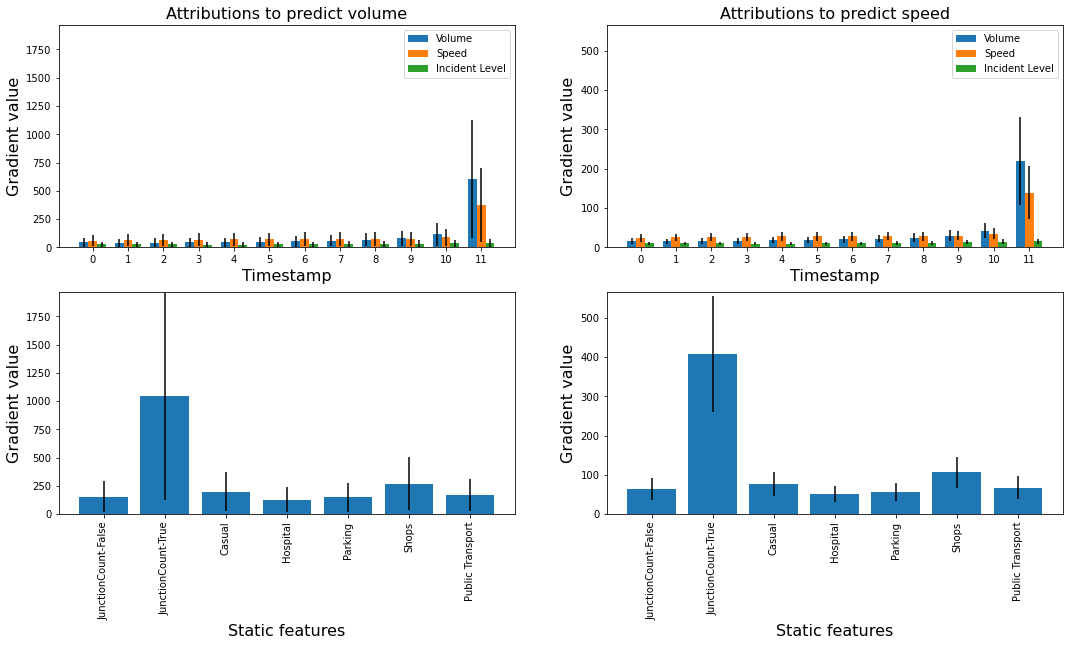

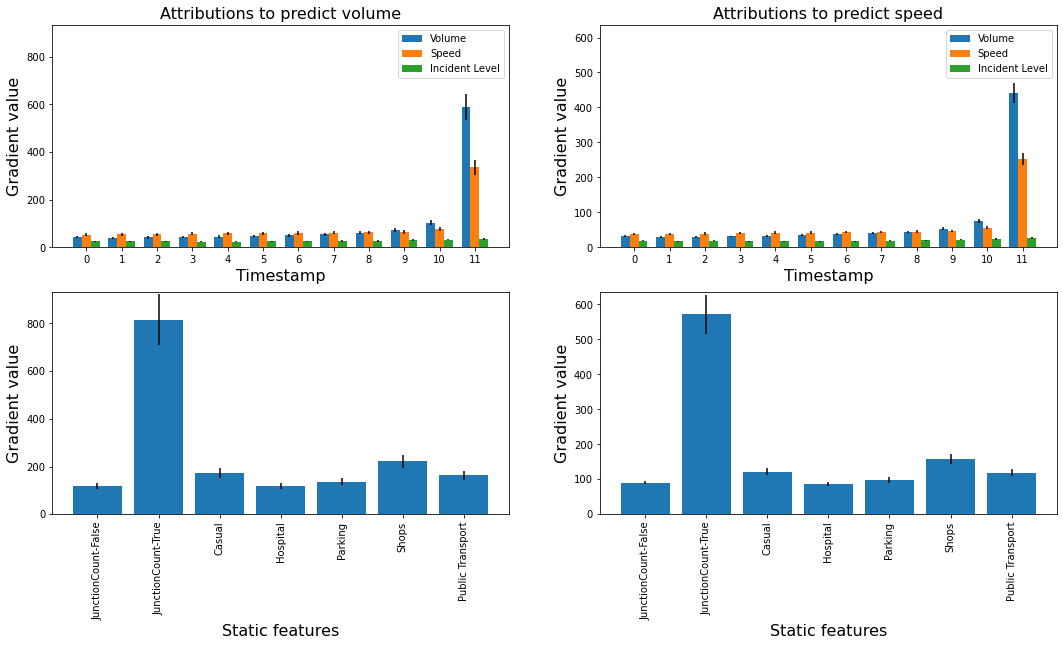

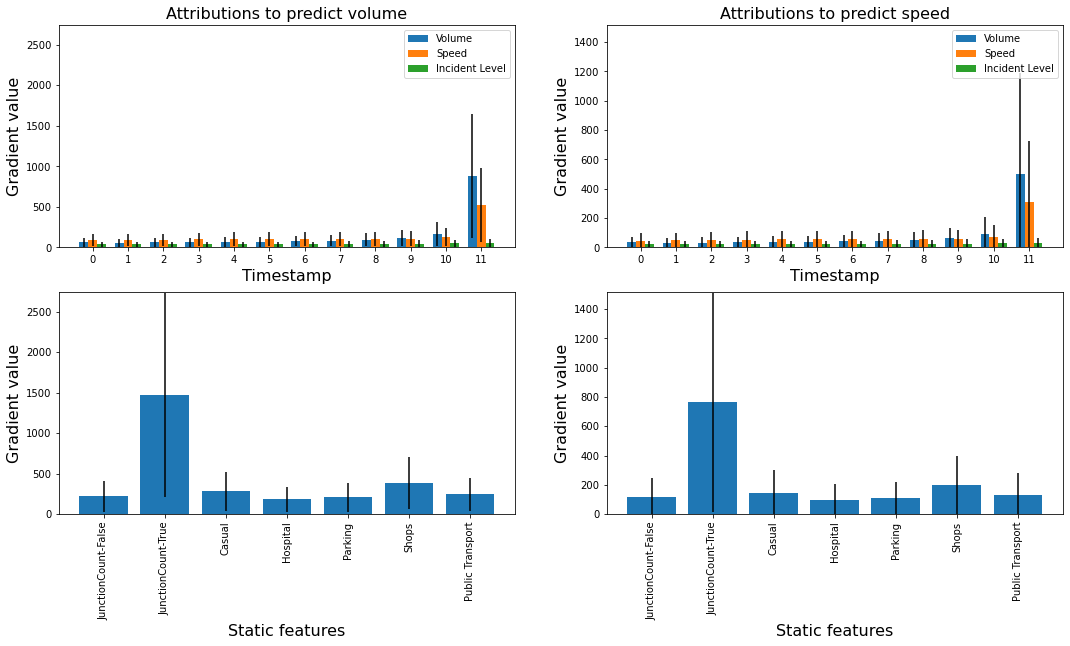

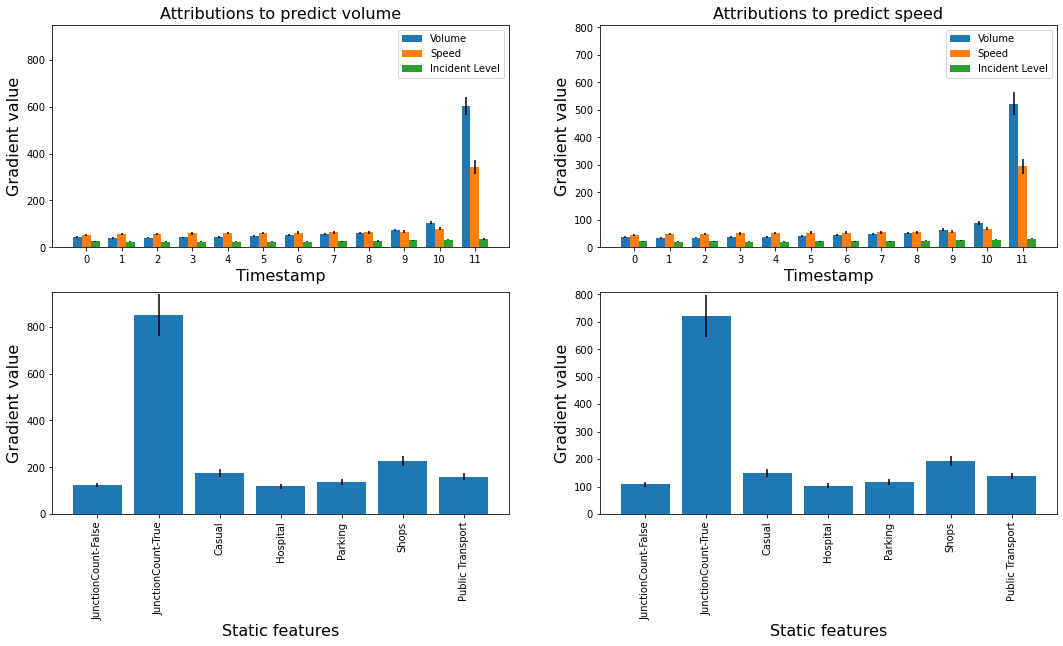

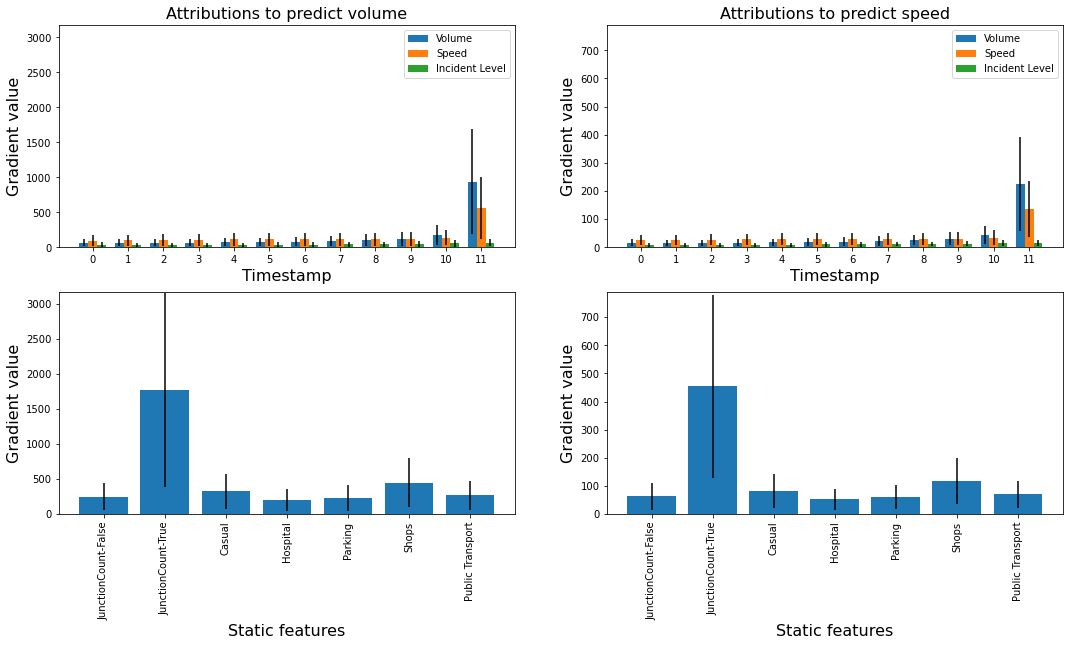

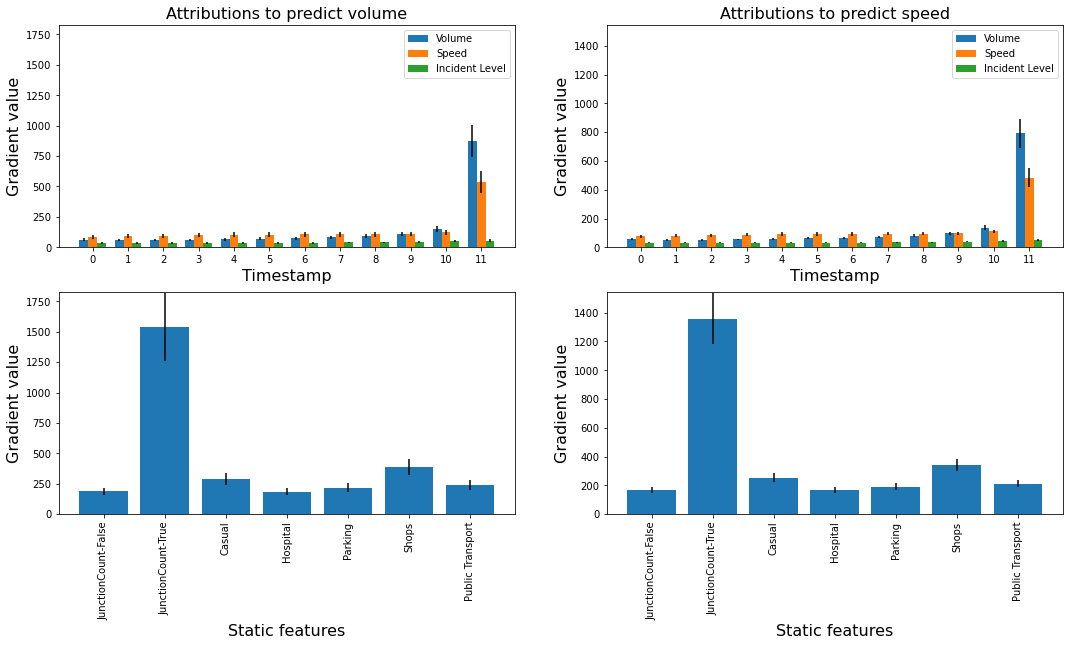

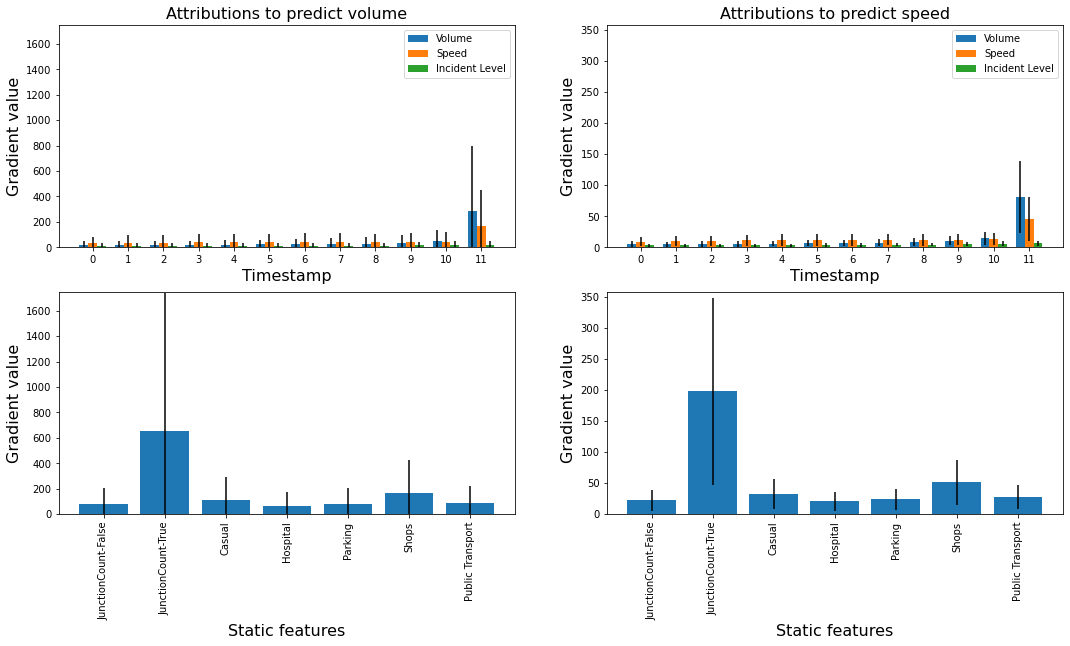

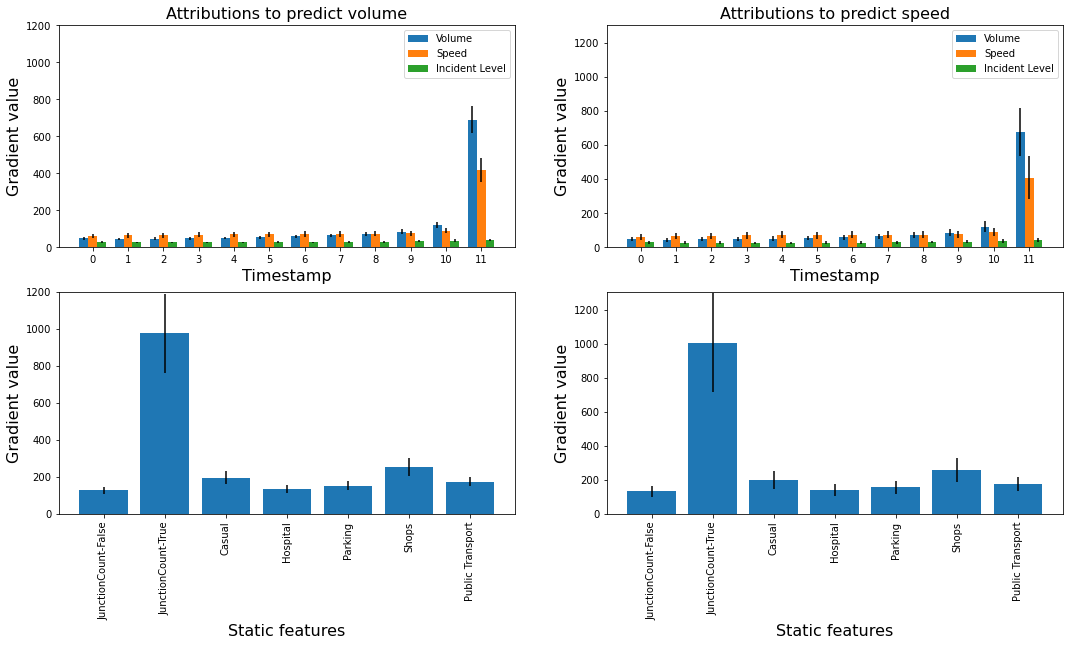

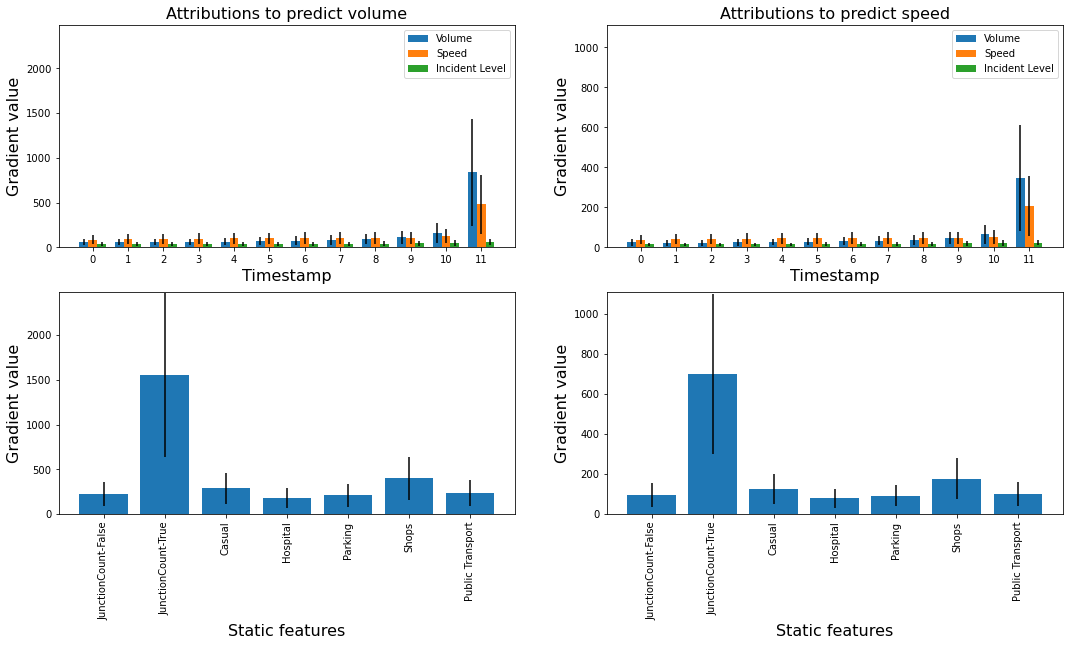

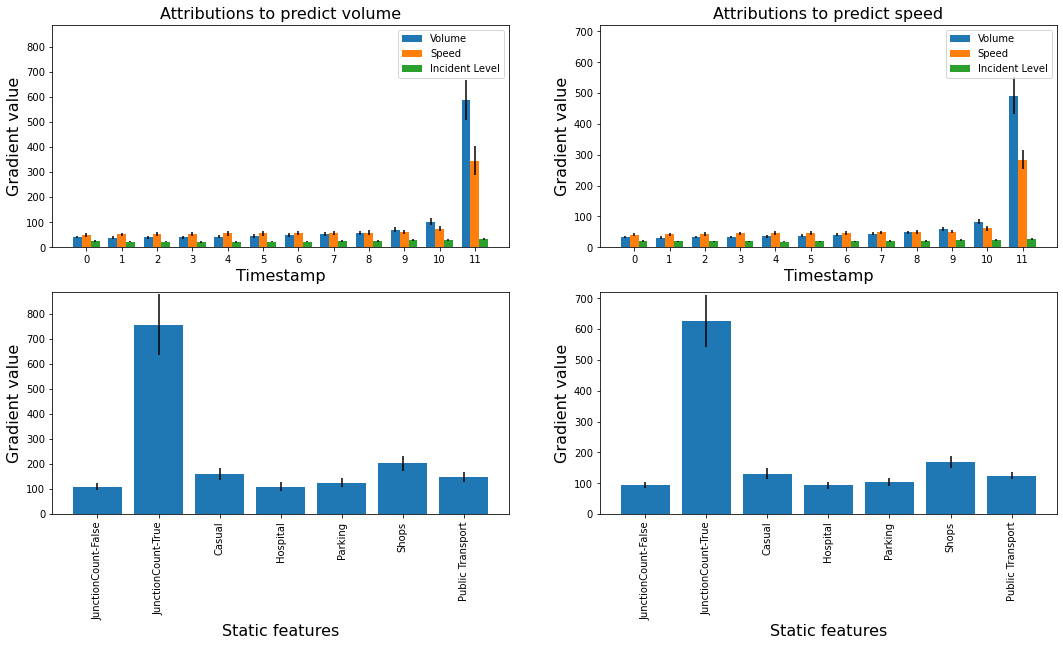

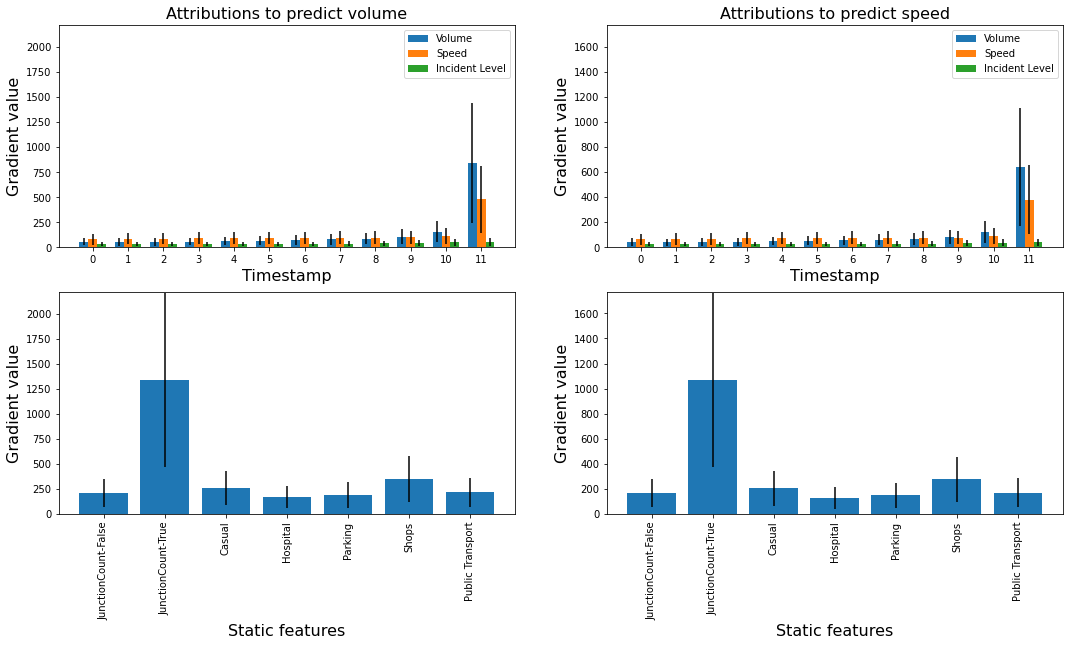

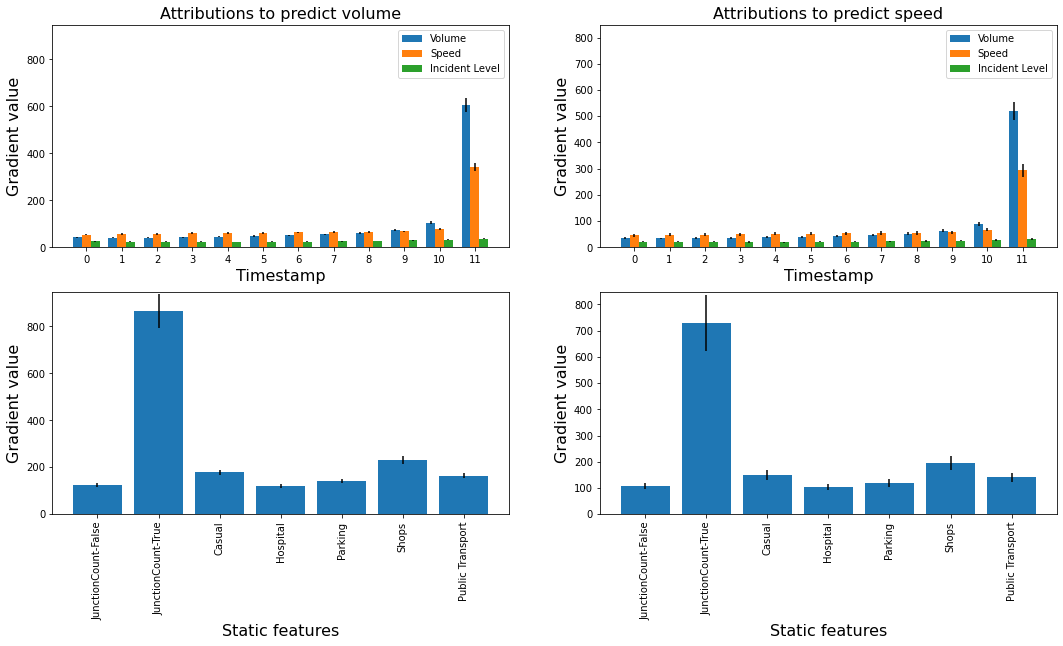

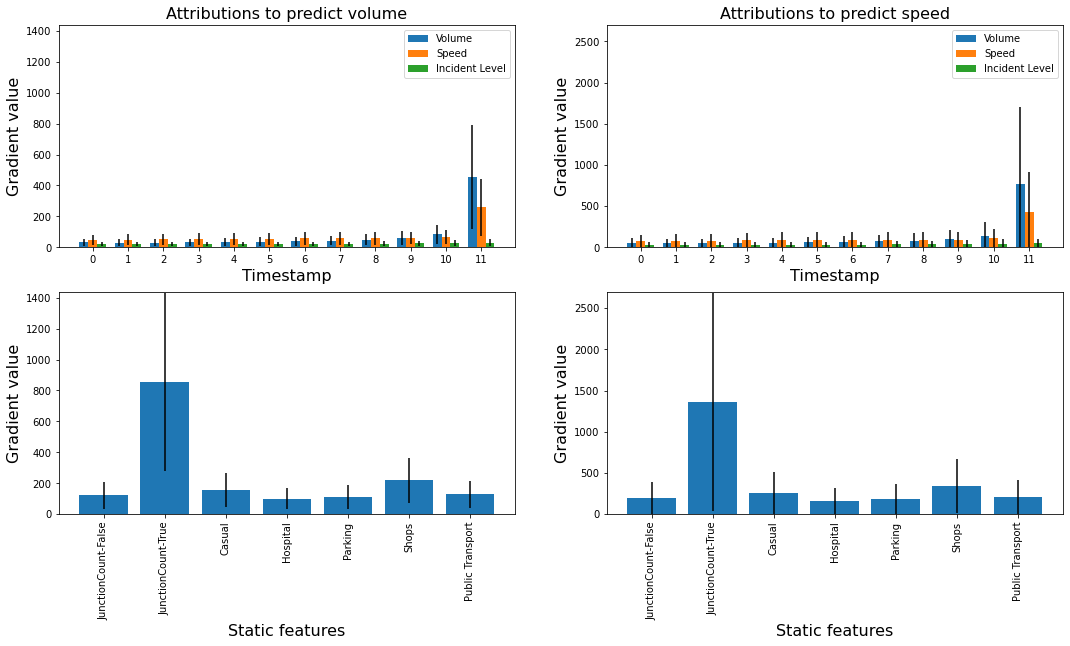

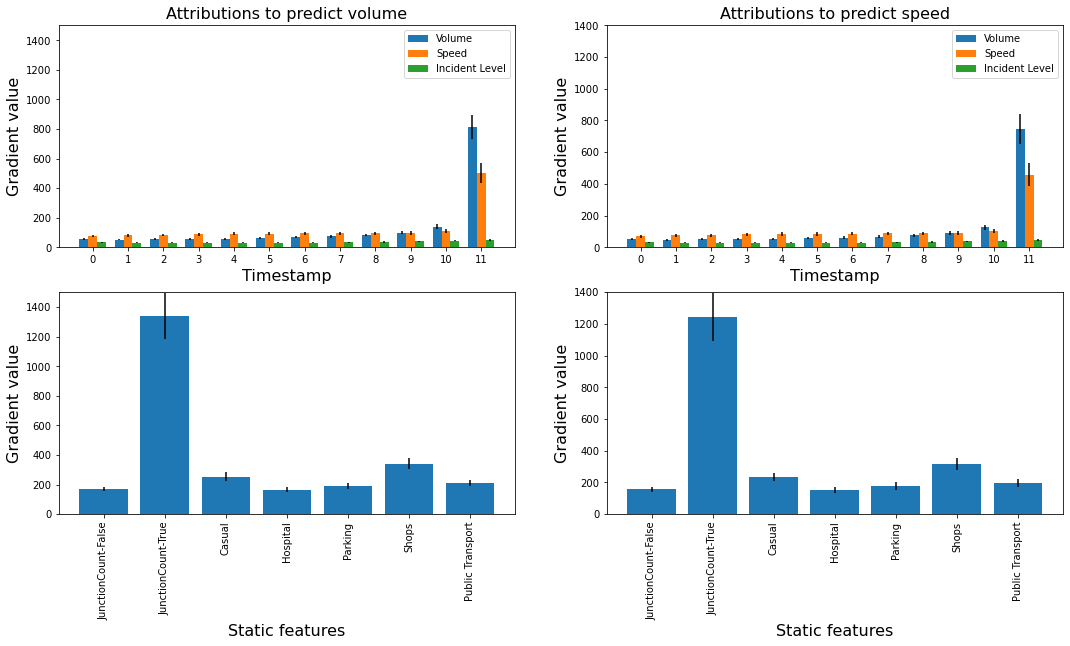

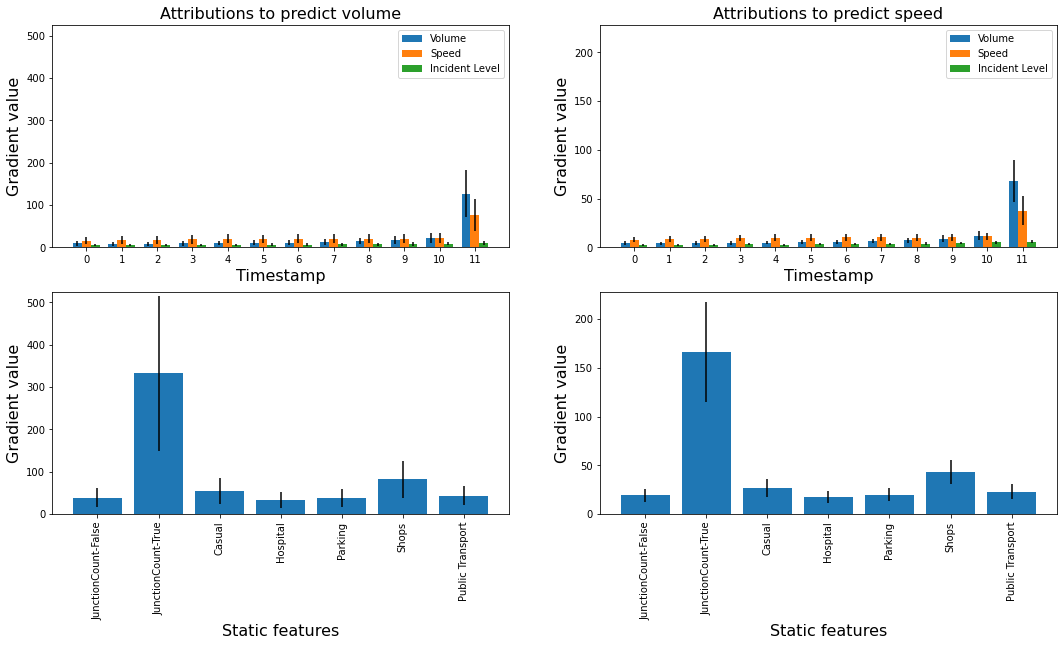

In [4]:
# Load data
for dtype in days:
    for loc_type in region:
        for _,tname in time.items():
            d_arr, d_err, s_arr, s_err = [],[],[],[]
            for channel in channels:
                agg_dynamic = np.load(os.path.join(log_root,f"{dtype}_{tname}_{loc_type}_{channel}_dynamic.npy"))
                dynamic_err =  np.load(os.path.join(log_root,f"{dtype}_{tname}_{loc_type}_{channel}_dynamic_err.npy"))
                agg_static = np.load(os.path.join(log_root,f"{dtype}_{tname}_{loc_type}_{channel}_static.npy"))
                static_err =  np.load(os.path.join(log_root,f"{dtype}_{tname}_{loc_type}_{channel}_static_err.npy"))
                d_arr.append(agg_dynamic)
                d_err.append(dynamic_err)
                s_arr.append(agg_static)
                s_err.append(static_err)
                
            figpath = os.path.join(figure_log_root, f"{dtype}_{tname}_{loc_type}.pdf")

            plot(d_arr, d_err, s_arr, s_err, figpath)